# Fractional Brownian Motion Parameter Estimation Using Periodogram Method

The periodigram method uses the fractional brownian noise power spectrum to estimate the Hurst,</br>
denoted by $H$. The power spectrum is the Fourier transform of the fractional brownian motion noise autocorrelation</br>
function. This relationship is called the Weiner-Khichnin theorem.</br>

Let $Z^H(t)$ denote a fractional path then fractional brownian noise is defined by,

$
\begin{align}
\Delta Z_k^H = Z^H(t_k) - Z^H(t_{k-1})
\end{align}
$

where $t_k = k \Delta t$. It follows that,

$
\begin{align}
Z^H(n\Delta t) = \sum_{i=1}^n \Delta Z_k^H
\end{align}
$

The autocovariance of fractional brownian noise is given by,

$
\begin{align}
\gamma^H_n = \text{Cov}[\Delta Z^H_t \Delta Z^H_{t+n}] = \frac{1}{2}\Delta t^{2H}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

Since $\text{Var}(\Delta Z_k^H) = \Delta t^{2H}$ the autocorrelation coefficient is defined by,</br>

$
\begin{align}
\rho^H_n = \frac{\gamma^H_n}{\Delta t^{2H}} = \frac{1}{2}[(n-1)^{2H} + (n+1)^{2H} - 2n^{2H}]
\end{align}
$

From the Weiner-Khichnin theorem the power spectrum is given by,</br>

$
\begin{align}
\hat{\rho}^H_\omega = \frac{1}{2} \int_{-\infty}^{\infty} \rho^H_n e^{-i \omega n} dn
\end{align}
$

It can be shown that fir $\omega \ggg 1$,

$
\begin{align}
\hat{\rho}^H_\omega \approx C\lvert \omega \rvert^{1 - 2H}
\end{align}
$

where $C$ is independent of $\omega$. It follows that $H$ can be determined by using OLS on $\hat{\rho}^H_\omega$ as a</br>
function of $\omega$.

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import fbm
from lib import bm
from lib import plots
from lib import config
from lib import stats
from lib.plots.data import (DataPlotType, curve)
from lib.plots.reg import (RegPlotType, reg)
from lib.stats import RegType

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Helpers

In [2]:
Δt = 1.0
npts = 2**10
ω = numpy.linspace(1.0, npts, npts-1)

## Power Spectrum Simulation H=0.8

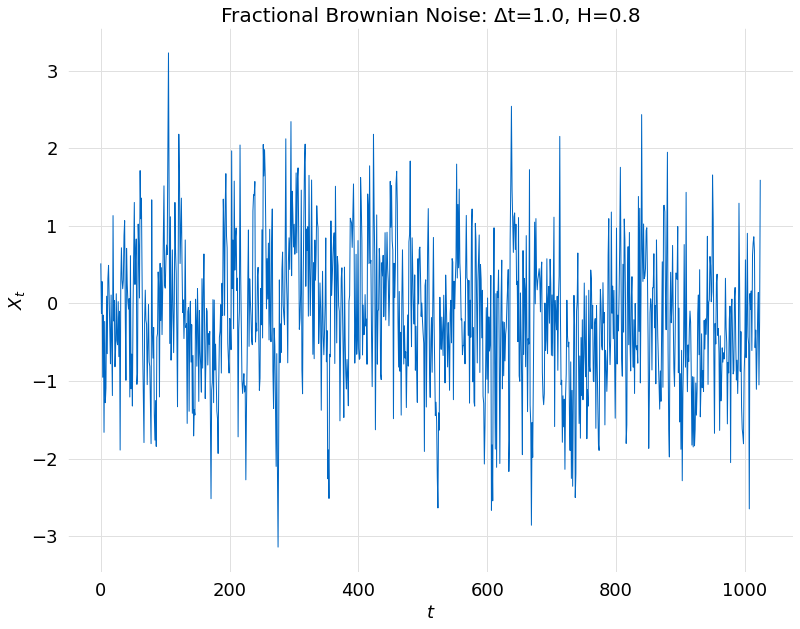

In [3]:
H = 0.8
samples = fbm.fft_noise(H, npts)
title = f"Fractional Brownian Noise: Δt={Δt}, H={H}"
curve(samples[:npts], title=title, lw=1, plot_type=DataPlotType.TIME_SERIES)

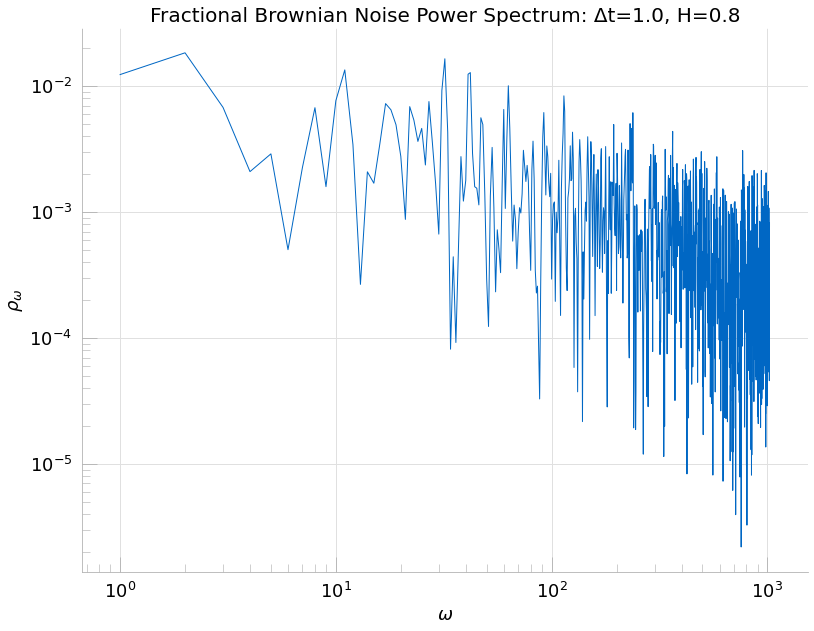

In [4]:
ps = stats.pspec(samples)
title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
curve(ps, title=title, plot_type=DataPlotType.PSPEC, lw=1)

In [5]:
results = stats.OLS_fit(ps, ω, RegType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     262.7
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           9.49e-53
Time:                        08:32:29   Log-Likelihood:                -808.16
No. Observations:                1023   AIC:                             1620.
Df Residuals:                    1021   BIC:                             1630.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7241      0.102    -16.919      0.000      -1.924      -1.524
x1            -0.6320      0.039    -16.208      0.000      -0.709      -0.556
==============================================================================
Omnibus:                       98.785   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.217
Skew:                          -0.803   Prob(JB):                     2.37e-28
Kurtosis:                       3.636   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

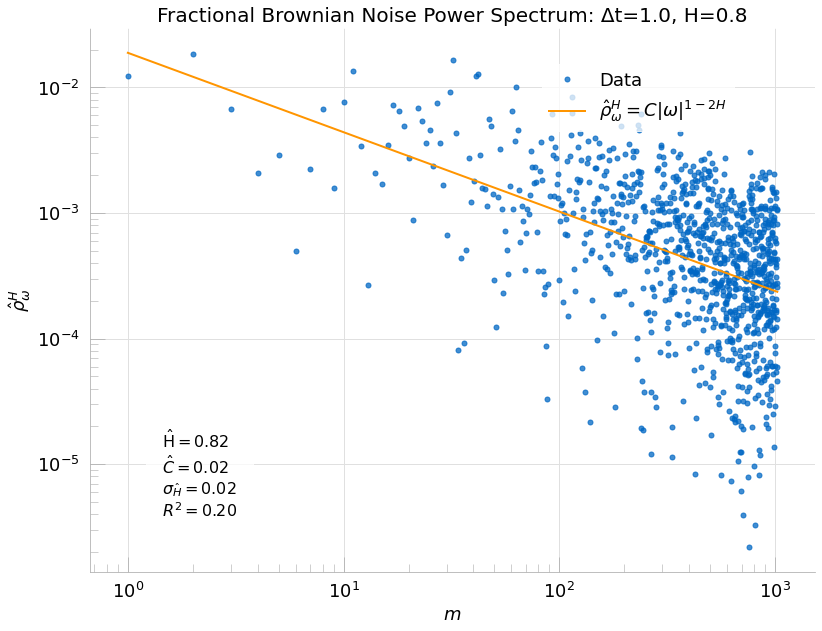

In [6]:
title = title = title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
reg(ps, ω, results, title=title, plot_type=RegPlotType.FBM_PSPEC)

## Power Spectrum Simulation H=0.3

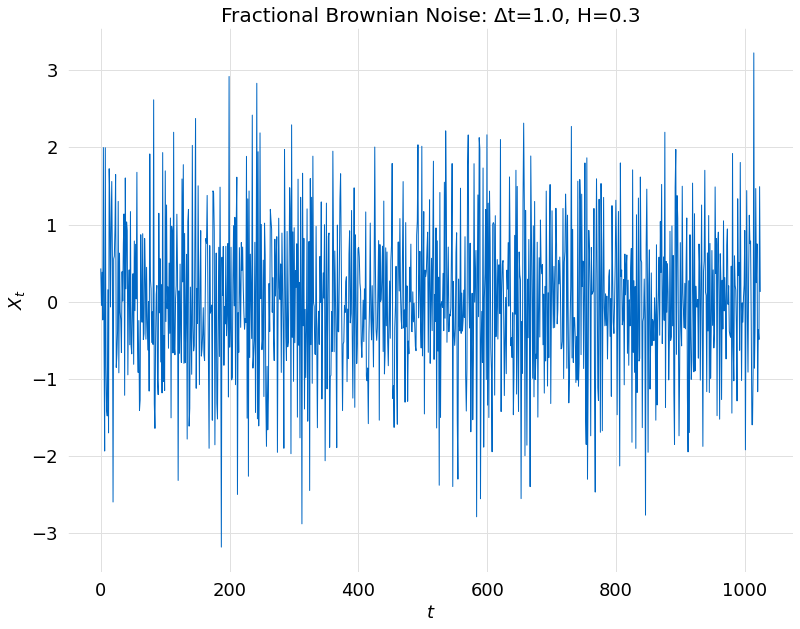

In [7]:
H = 0.3
samples = fbm.fft_noise(H, npts)
title = f"Fractional Brownian Noise: Δt={Δt}, H={H}"
curve(samples[:npts], title=title, lw=1, plot_type=DataPlotType.TIME_SERIES)

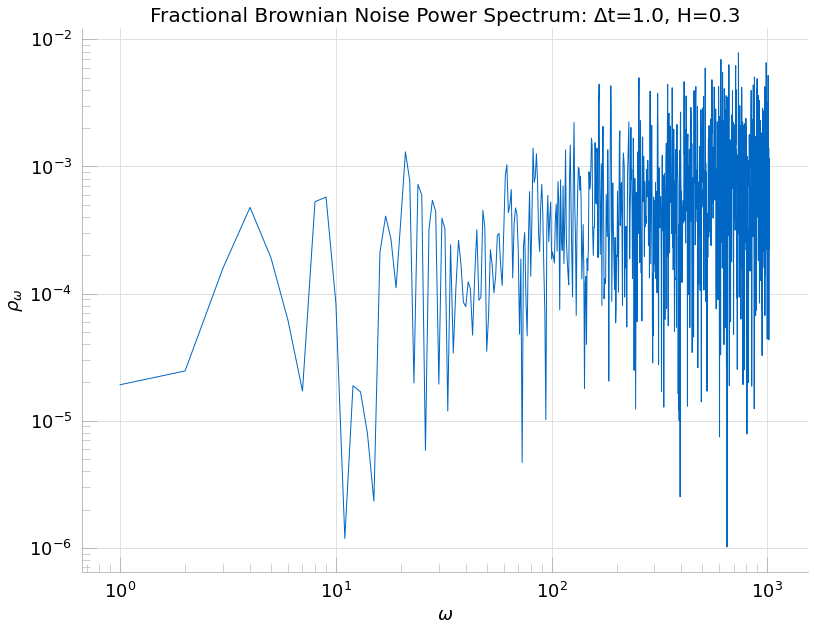

In [8]:
ps = stats.pspec(samples)
title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
curve(ps, x=ω, title=title, plot_type=DataPlotType.PSPEC, lw=1)

In [9]:
results = stats.OLS_fit(ps, ω, RegType.LOG)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     133.8
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           3.63e-29
Time:                        08:32:30   Log-Likelihood:                -837.35
No. Observations:                1023   AIC:                             1679.
Df Residuals:                    1021   BIC:                             1689.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.4947      0.105    -42.869      0.000      -4.700      -4.289
x1             0.4641      0.040     11.567      0.000       0.385       0.543
==============================================================================
Omnibus:                      143.496   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.388
Skew:                          -0.928   Prob(JB):                     9.37e-51
Kurtosis:                       4.399   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

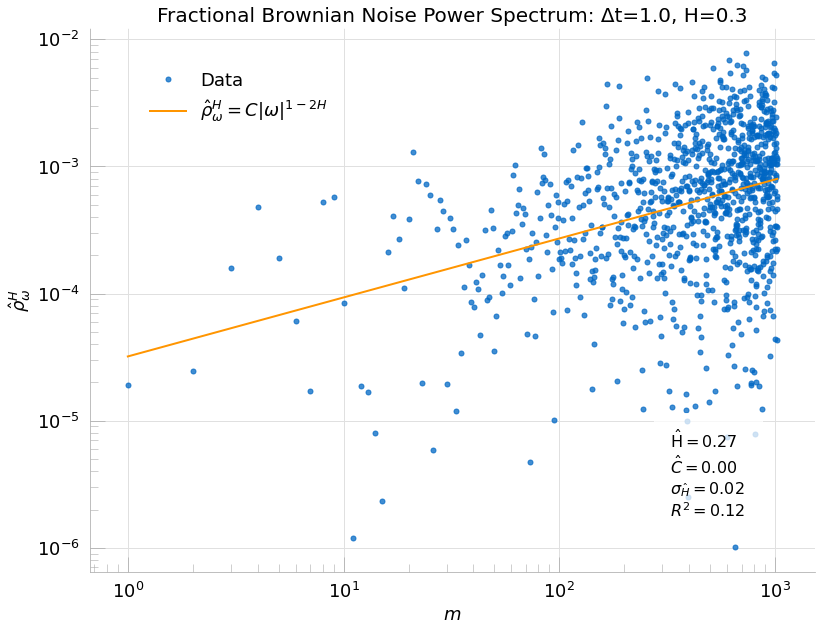

In [10]:
title = title = title = f"Fractional Brownian Noise Power Spectrum: Δt={Δt}, H={H}"
reg(ps, ω, results, title=title, plot_type=RegPlotType.FBM_PSPEC)